# Welcome to an example Binder

This notebook loads example files from S3 to show that remote data is accessible from within a Binder.

## Setup imports

In [1]:
from boto.s3.connection import S3Connection
import requests
from io import BytesIO
from PIL import Image
import pandas as pd

## Load an image (from S3)

To use `boto` to load our data, we start by making an `S3Connection`. Because the data are public, we set `anon` to `True`. (NOTE: currently passing empty strings as credentials to prevent a weird bug where `boto` tries and fails to pull credentials automatically, this may be specific to running in GCE.)

In [2]:
conn = S3Connection('', '', anon=True)

Get the bucket

In [3]:
bucket = conn.get_bucket('binder-sample-data')

Get the key to the image file

In [4]:
key = bucket.get_key('sample-image.png')

Load the contents into a buffer and load into an image

In [5]:
raw = key.get_contents_as_string()
buf = BytesIO(raw)
im = Image.open(buf)

Show our image using Jupyter's rich display system!

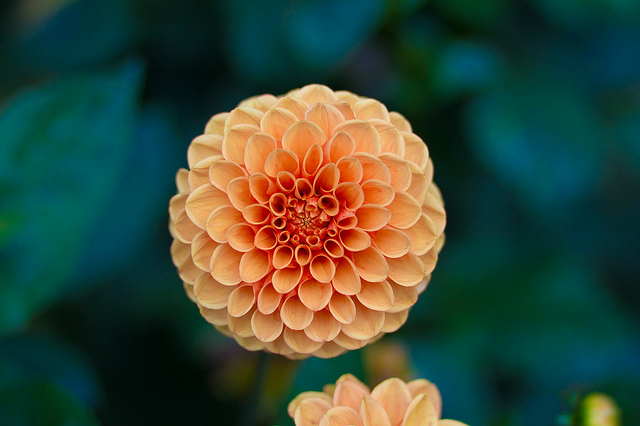

In [6]:
im

## Load a table (from S3)

We're going to do something very similar, but for a table stored as CSV

First get the bucket and key as before

In [7]:
bucket = conn.get_bucket('binder-sample-data')
key = bucket.get_key('sample-table.csv')

Now load the file into a byte buffer

In [8]:
blob = BytesIO(key.get_contents_as_string())

And read it into pandas

In [9]:
data = pd.read_csv(blob)

And display with the rich display system

In [10]:
data.head(10)

year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119